<a href="https://colab.research.google.com/github/danyfatihul-14/PCVK_Ganjil_2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.import folder yang ada di Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.**

In [9]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

## **3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)**

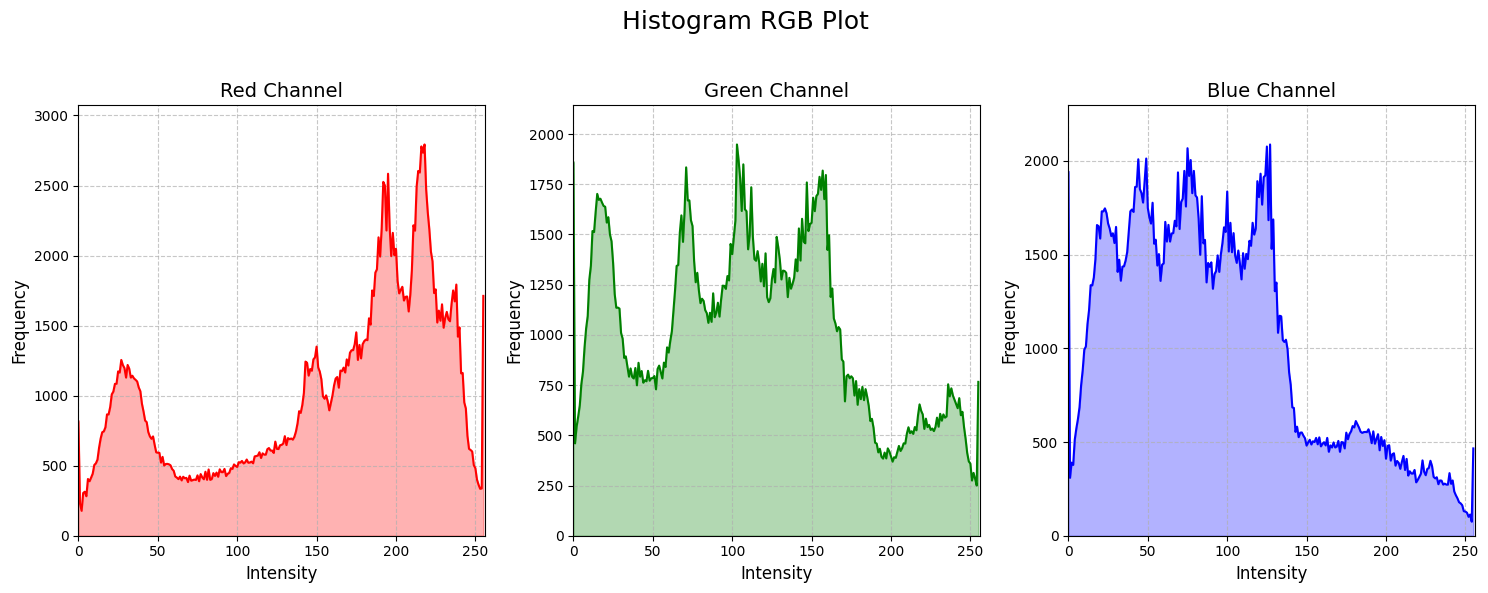

In [17]:
# Step 1: Baca gambar dari Google Drive
image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Step 3: Pisahkan channel RGB
channels = cv.split(image_rgb)
colors = ('r', 'g', 'b')  # RGB colors
channel_names = ['Red', 'Green', 'Blue']

# Step 4: Buat histogram untuk masing-masing channel dengan pengaturan lebih detail
plt.figure(figsize=(15, 6))  # Ukuran diperbesar
plt.suptitle('Histogram RGB Plot', fontsize=18)

for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(1, 3, i + 1)
    histogram = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color, linewidth=1.5)  # Perbesar ketebalan garis
    plt.fill_between(range(256), histogram[:, 0], color=color, alpha=0.3)  # Isi area di bawah garis
    plt.xlim([0, 256])
    plt.ylim([0, max(histogram) * 1.1])  # Naikkan limit Y untuk memberi ruang
    plt.grid(True, linestyle='--', alpha=0.7)  # Tambahkan grid untuk panduan
    plt.xlabel('Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'{channel_names[i]} Channel', fontsize=14)

# Step 5: Tampilkan histogram
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 4. **Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?**

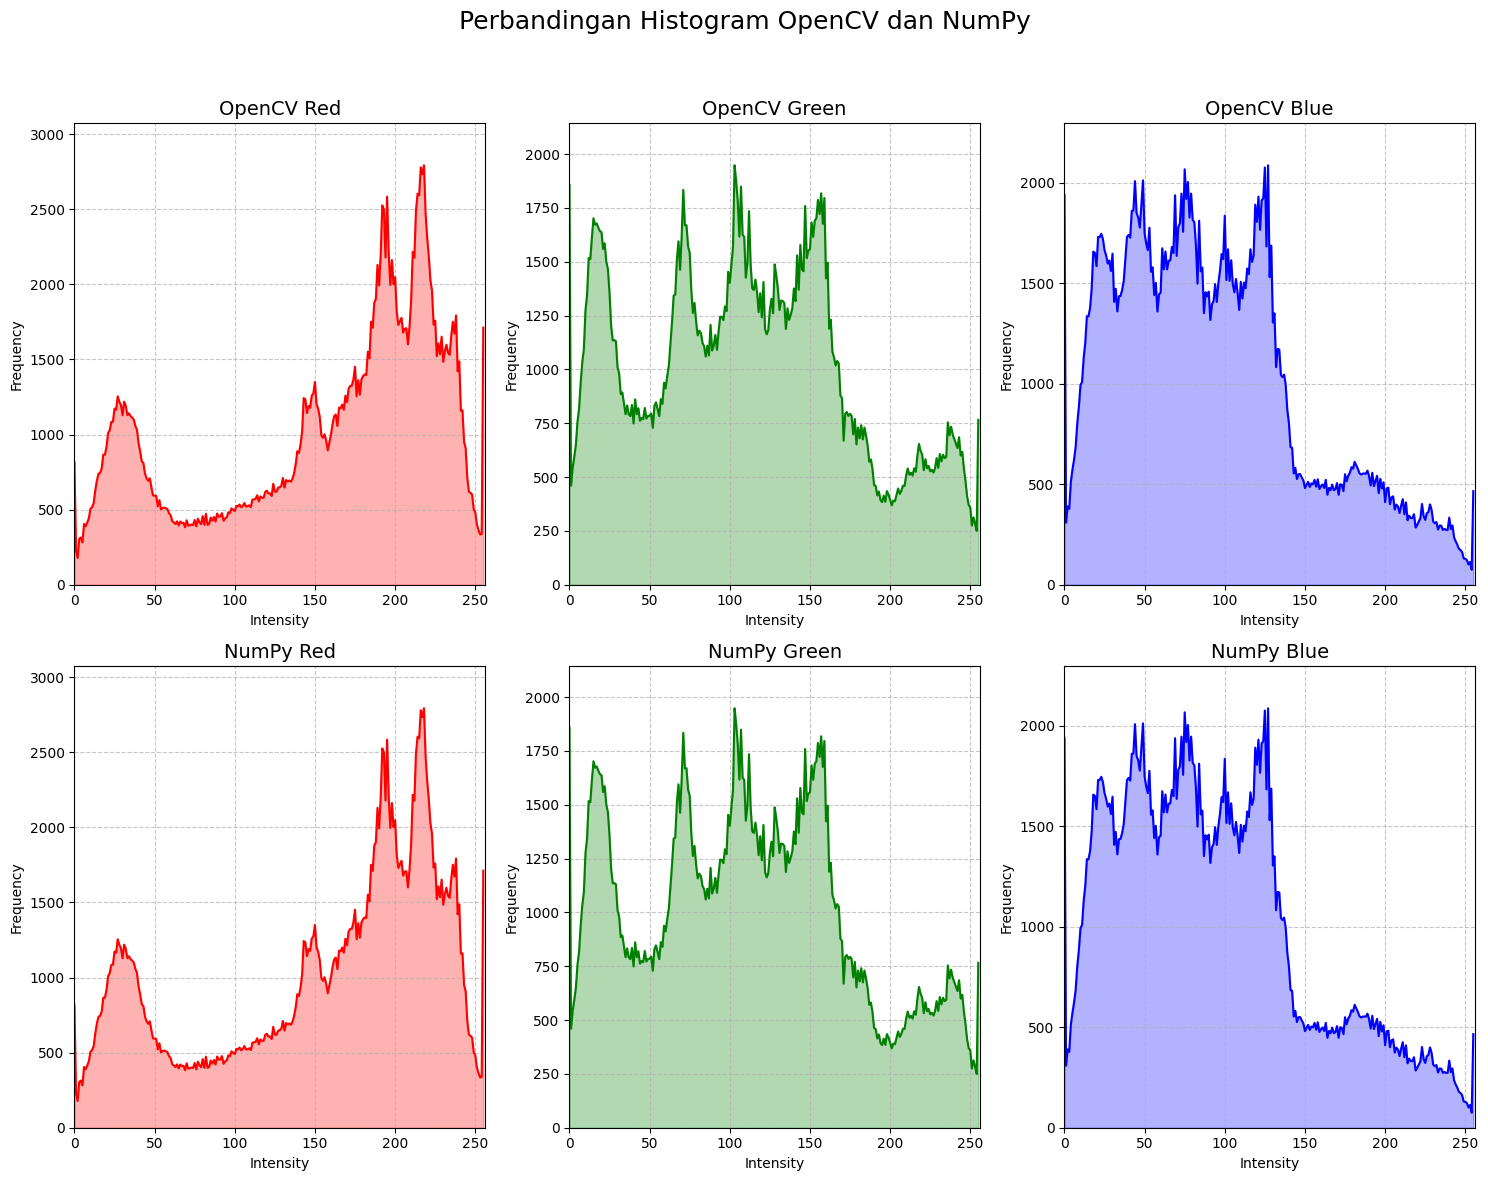

In [20]:
# Step 1: Baca gambar dari Google Drive
image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Step 3: Pisahkan channel RGB
channels = cv.split(image_rgb)
colors = ('r', 'g', 'b')  # RGB colors
channel_names = ['Red', 'Green', 'Blue']

# Step 4: Buat histogram menggunakan OpenCV
plt.figure(figsize=(15, 12))
plt.suptitle('Perbandingan Histogram OpenCV dan NumPy', fontsize=18)

for i, (channel, color) in enumerate(zip(channels, colors)):
    # Histogram dengan OpenCV
    plt.subplot(2, 3, i + 1)
    histogram_cv = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram_cv, color=color, linewidth=1.5)
    plt.fill_between(range(256), histogram_cv[:, 0], color=color, alpha=0.3)
    plt.xlim([0, 256])
    plt.ylim([0, max(histogram_cv) * 1.1])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'OpenCV {channel_names[i]}', fontsize=14)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    # Histogram dengan NumPy
    plt.subplot(2, 3, i + 4)
    histogram_np, bins = np.histogram(channel.ravel(), bins=256, range=(0, 256))
    plt.plot(histogram_np, color=color, linewidth=1.5)
    plt.fill_between(range(256), histogram_np, color=color, alpha=0.3)
    plt.xlim([0, 256])
    plt.ylim([0, max(histogram_np) * 1.1])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'NumPy {channel_names[i]}', fontsize=14)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

# Step 5: Tampilkan hasil perbandingan
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Secara teoretis, hasil histogram dari OpenCV dan NumPy akan sama karena keduanya menghitung distribusi intensitas piksel untuk setiap channel dengan rentang 0 hingga 256. Namun, ada kemungkinan muncul perbedaan kecil akibat metode atau implementasi internal yang berbeda di antara kedua fungsi tersebut. Misalnya, dalam hal perhitungan binning, OpenCV mungkin sedikit berbeda dalam cara menghitungnya dibandingkan NumPy, meskipun hasil akhirnya hampir serupa. Selain itu, OpenCV yang dirancang khusus untuk pengolahan citra mungkin memiliki optimasi kinerja yang tidak dimiliki NumPy, yang merupakan library umum untuk komputasi numerik.

## **5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)**

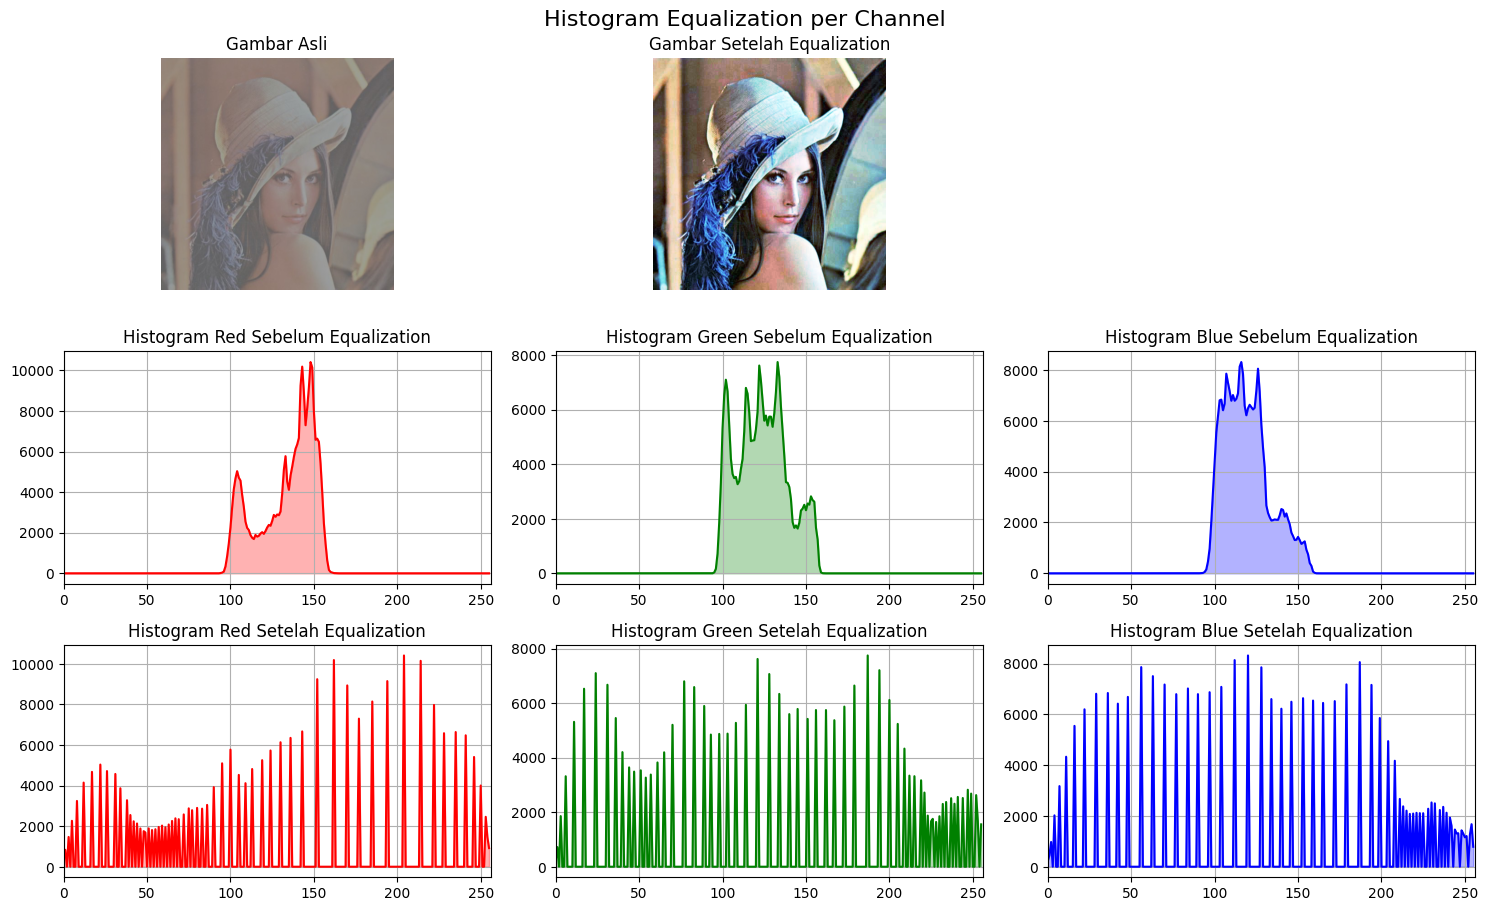

In [27]:
# Step 1: Baca gambar 'lena_lc.jpg' dari Google Drive atau lokal
image_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'  # Ubah sesuai lokasi gambar Anda
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Step 3: Pisahkan channel RGB
channels = cv.split(image_rgb)
channel_names = ['Red', 'Green', 'Blue']
colors = ('r', 'g', 'b')

# Step 4: Lakukan histogram equalization untuk masing-masing channel
equalized_channels = [cv.equalizeHist(channel) for channel in channels]
equalized_image_rgb = cv.merge(equalized_channels)

# Step 5: Setup layout
plt.figure(figsize=(15, 12))
plt.suptitle('Histogram Equalization per Channel', fontsize=16)

# Tampilkan gambar asli
plt.subplot(4, 3, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Tampilkan gambar setelah equalization
plt.subplot(4, 3, 2)
plt.imshow(equalized_image_rgb)
plt.title('Gambar Setelah Equalization')
plt.axis('off')

# Tampilkan histogram setiap channel sebelum equalization
for i, (channel, color, name) in enumerate(zip(channels, colors, channel_names)):
    plt.subplot(4, 3, 4 + i)
    histogram = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram[:, 0], color=color, alpha=0.3)
    plt.title(f'Histogram {name} Sebelum Equalization')
    plt.xlim([0, 256])
    plt.grid(True)

# Tampilkan histogram setiap channel setelah equalization
for i, (equalized_channel, color, name) in enumerate(zip(equalized_channels, colors, channel_names)):
    plt.subplot(4, 3, 7 + i)
    histogram_eq = cv.calcHist([equalized_channel], [0], None, [256], [0, 256])
    plt.plot(histogram_eq, color=color)
    plt.fill_between(range(256), histogram_eq[:, 0], color=color, alpha=0.3)
    plt.title(f'Histogram {name} Setelah Equalization')
    plt.xlim([0, 256])
    plt.grid(True)

# Tampilkan semua plot
plt.tight_layout()
plt.show()

## **6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?**

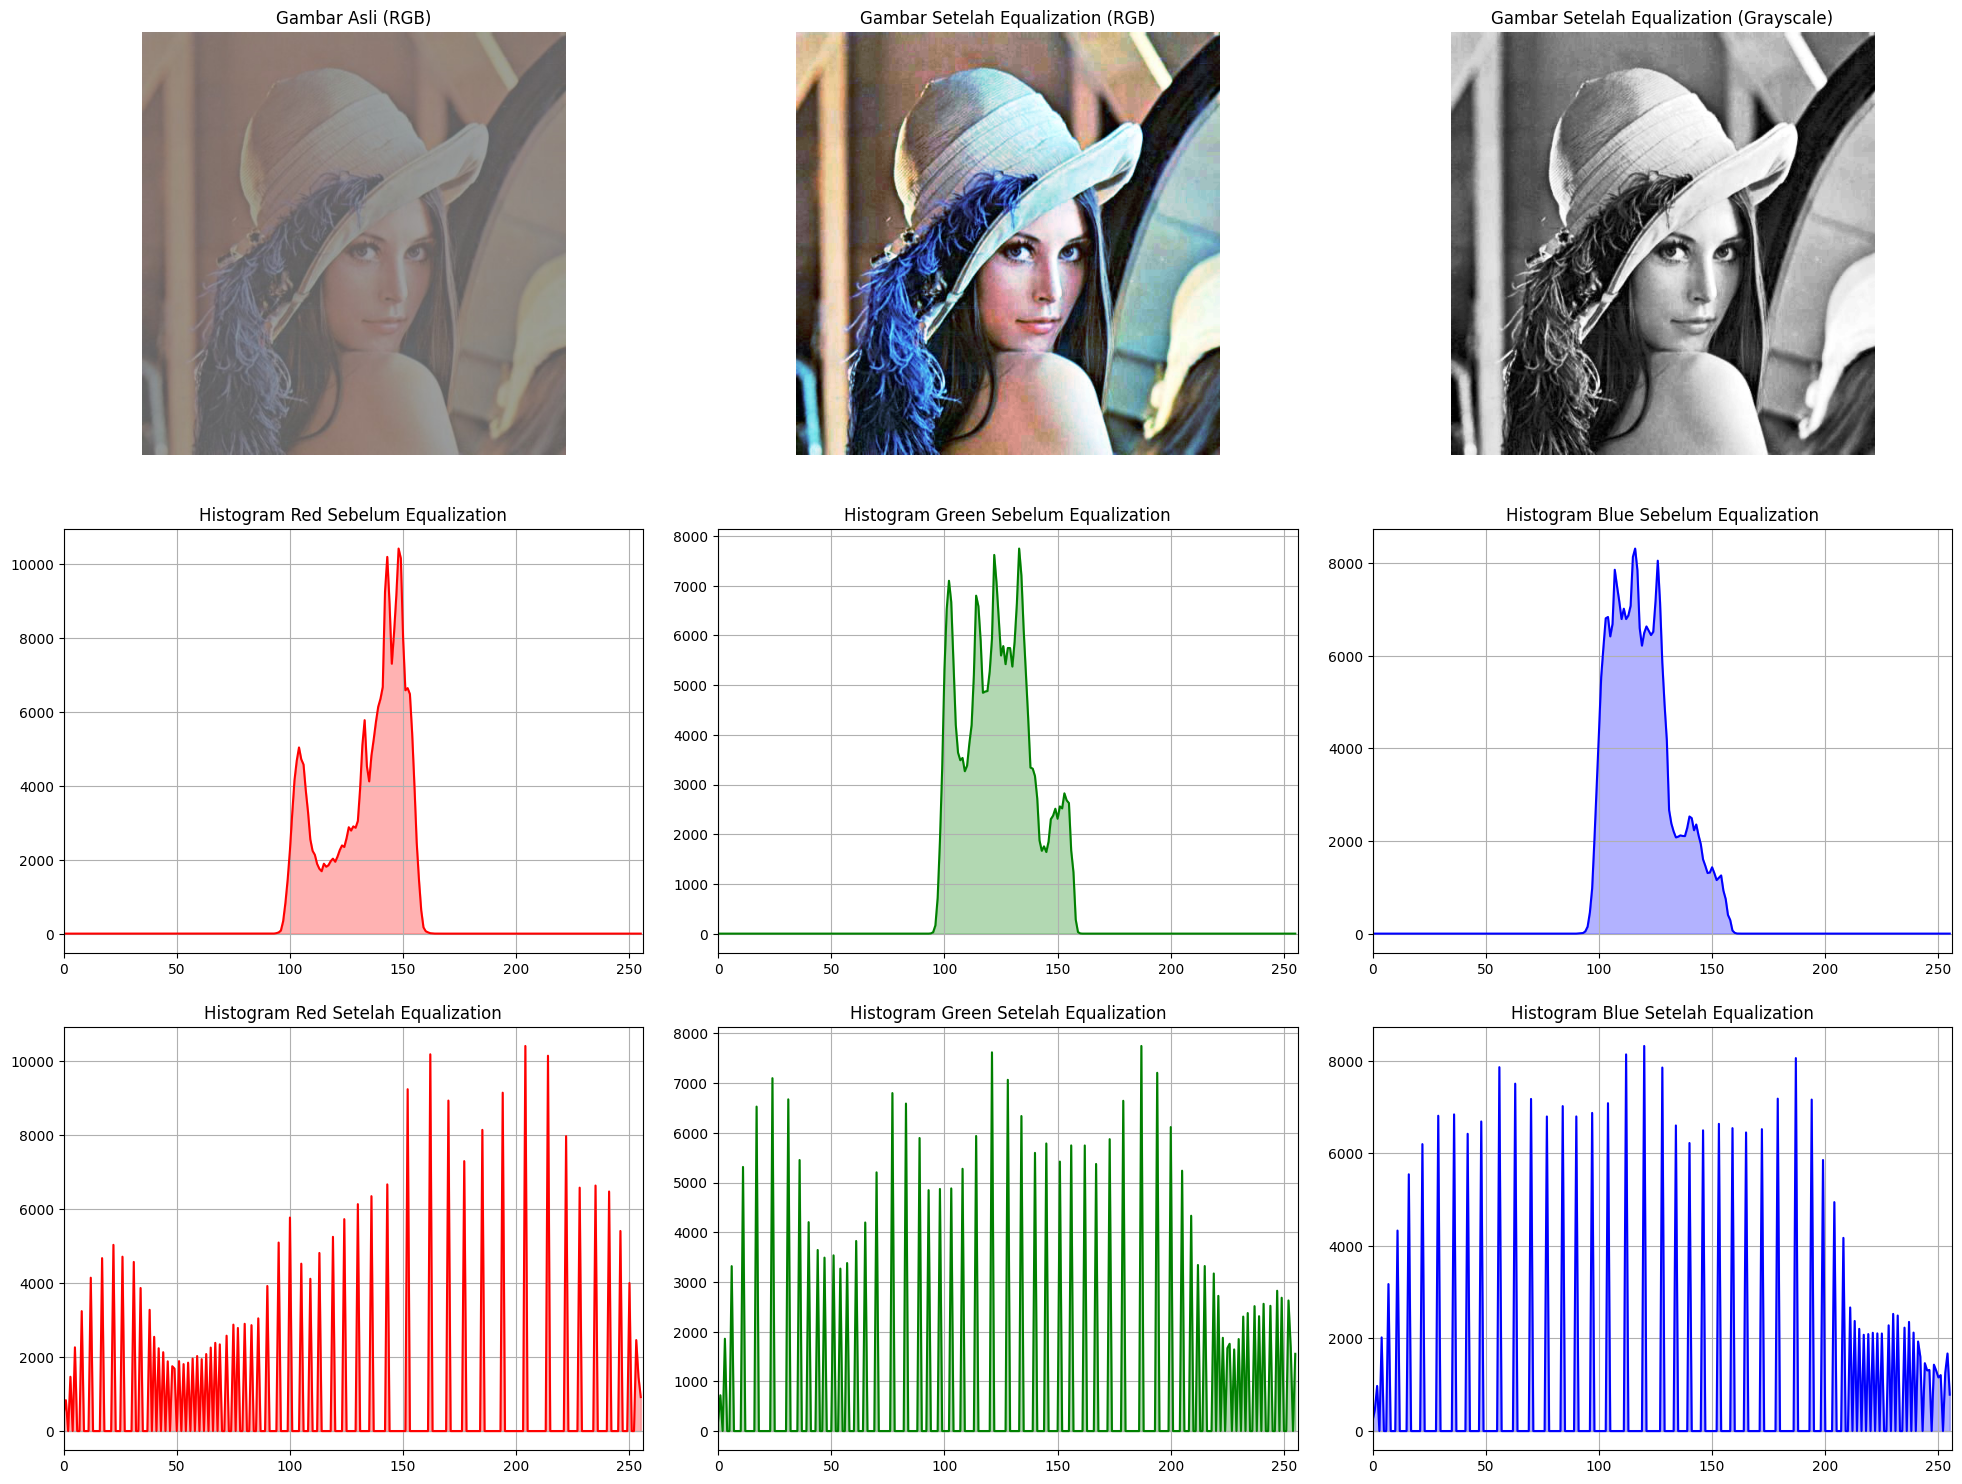

In [30]:
# Step 1: Baca gambar 'lena_lc.jpg' dari Google Drive atau lokal
image_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'  # Ubah sesuai lokasi gambar Anda
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB dan Grayscale
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Step 3: Pisahkan channel RGB
channels = cv.split(image_rgb)
channel_names = ['Red', 'Green', 'Blue']
colors = ('r', 'g', 'b')

# Step 4: Lakukan histogram equalization per channel (RGB)
equalized_channels = [cv.equalizeHist(channel) for channel in channels]
equalized_image_rgb = cv.merge(equalized_channels)

# Step 5: Lakukan histogram equalization untuk gambar grayscale
equalized_image_gray = cv.equalizeHist(image_gray)

# Step 6: Setup layout
plt.figure(figsize=(20, 16))  # Meningkatkan ukuran figure

# Tampilkan gambar asli
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli (RGB)')
plt.axis('off')

# Tampilkan gambar setelah equalization (RGB)
plt.subplot(3, 3, 2)
plt.imshow(equalized_image_rgb)
plt.title('Gambar Setelah Equalization (RGB)')
plt.axis('off')

# Tampilkan gambar grayscale setelah equalization
plt.subplot(3, 3, 3)
plt.imshow(equalized_image_gray, cmap='gray')
plt.title('Gambar Setelah Equalization (Grayscale)')
plt.axis('off')

# Tampilkan histogram setiap channel sebelum equalization (RGB)
for i, (channel, color, name) in enumerate(zip(channels, colors, channel_names)):
    plt.subplot(3, 3, 4 + i)
    histogram = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram[:, 0], color=color, alpha=0.3)
    plt.title(f'Histogram {name} Sebelum Equalization')
    plt.xlim([0, 256])
    plt.grid(True)

# Tampilkan histogram setiap channel setelah equalization (RGB)
for i, (equalized_channel, color, name) in enumerate(zip(equalized_channels, colors, channel_names)):
    plt.subplot(3, 3, 7 + i)
    histogram_eq = cv.calcHist([equalized_channel], [0], None, [256], [0, 256])
    plt.plot(histogram_eq, color=color)
    plt.fill_between(range(256), histogram_eq[:, 0], color=color, alpha=0.3)
    plt.title(f'Histogram {name} Setelah Equalization')
    plt.xlim([0, 256])
    plt.grid(True)

# Mengatur tata letak agar lebih rapi
plt.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])
plt.show()

## **7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)**

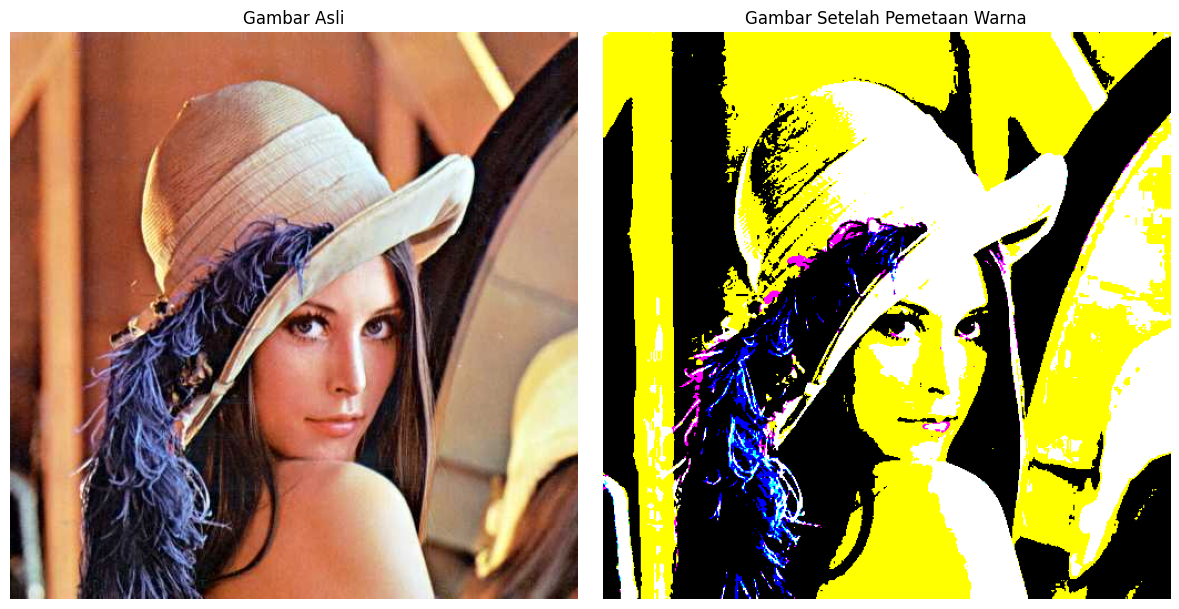

In [33]:
# Step 1: Baca gambar 'lena.jpg' dari Google Drive atau lokal
image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'  # Ubah sesuai lokasi gambar Anda
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Step 3: Definisikan warna target (RGB)
colors = {
    'black': [0, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255]
}

# Step 4: Fungsi untuk memetakan warna
def map_color(pixel):
    # Hitung jarak Euclidean ke setiap warna
    distances = {name: np.linalg.norm(np.array(pixel) - np.array(rgb)) for name, rgb in colors.items()}
    # Kembalikan warna dengan jarak terdekat
    return min(distances, key=distances.get)

# Step 5: Pemetaan warna
mapped_image = np.zeros_like(image_rgb)  # Gambar hasil pemetaan
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        pixel_color = image_rgb[i, j]
        mapped_color_name = map_color(pixel_color)
        mapped_image[i, j] = colors[mapped_color_name]

# Step 6: Tampilkan gambar asli dan gambar hasil pemetaan
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Tampilkan gambar hasil pemetaan
plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

# Tampilkan semua plot
plt.tight_layout()
plt.show()

## **8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)**

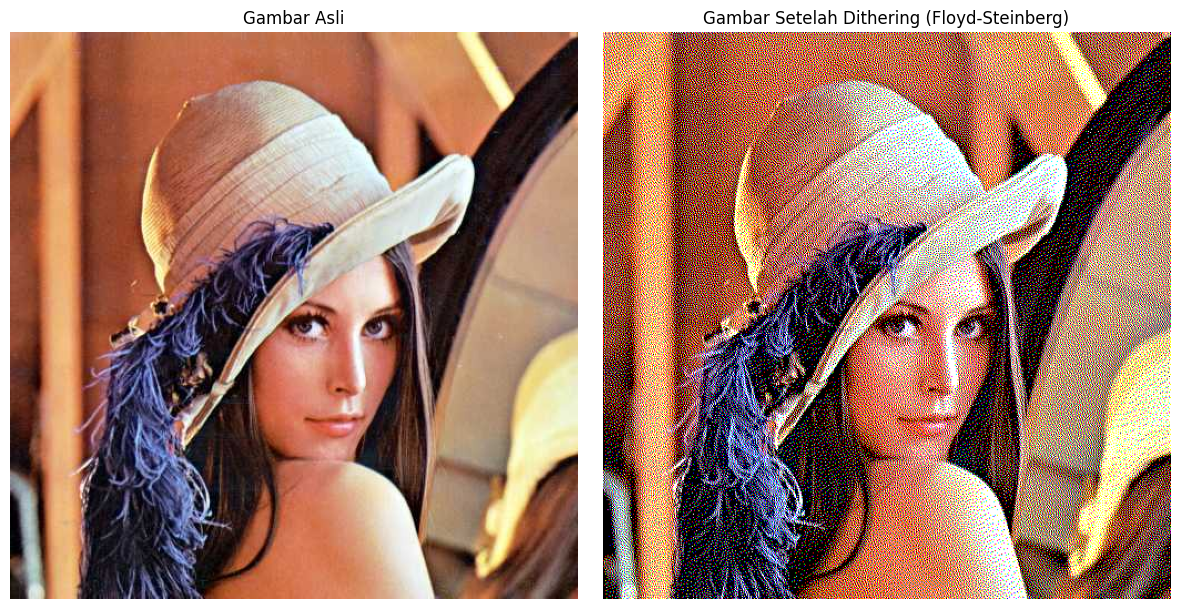

In [35]:
# Step 1: Baca gambar 'lena.jpg' dari Google Drive atau lokal
image_path = '/content/drive/MyDrive/PCVK/Images/lena.jpg'  # Ubah sesuai lokasi gambar Anda
image = cv.imread(image_path)

# Step 2: Konversi gambar dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Step 3: Fungsi dithering Floyd-Steinberg untuk RGB
def floyd_steinberg_dithering(image):
    height, width, channels = image.shape
    dithered_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            for c in range(channels):
                old_pixel = image[y, x, c]
                new_pixel = 255 * (old_pixel > 127)  # Jika lebih dari 127, jadi putih, jika tidak jadi hitam
                dithered_image[y, x, c] = new_pixel

                # Hitung kesalahan
                error = old_pixel - new_pixel

                # Sebarkan kesalahan ke piksel tetangga
                if x + 1 < width:
                    image[y, x + 1, c] += error * 7 / 16
                if x - 1 >= 0 and y + 1 < height:
                    image[y + 1, x - 1, c] += error * 3 / 16
                if y + 1 < height:
                    image[y + 1, x, c] += error * 5 / 16
                if x + 1 < width and y + 1 < height:
                    image[y + 1, x + 1, c] += error * 1 / 16

    return dithered_image

# Step 4: Dithering
dithered_image = floyd_steinberg_dithering(image_rgb.astype(float))

# Step 5: Tampilkan gambar asli dan gambar setelah dithering
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_image.astype(np.uint8))
plt.title('Gambar Setelah Dithering (Floyd-Steinberg)')
plt.axis('off')

# Tampilkan semua plot
plt.tight_layout()
plt.show()

## **9.Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!**

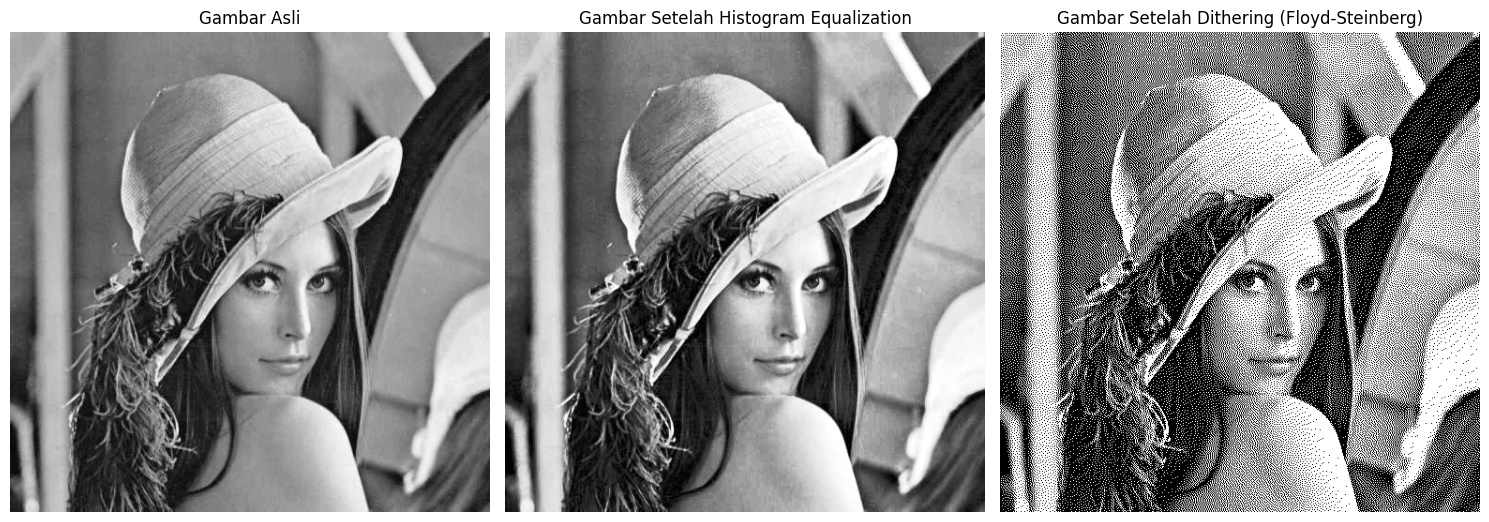

In [36]:
# Step 1: Baca gambar 'lena_lc.jpg' dari Google Drive atau lokal
image_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'  # Ubah sesuai lokasi gambar Anda
image = cv.imread(image_path)

# Step 2: Konversi gambar ke Grayscale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Step 3: Terapkan Histogram Equalization
equalized_image = cv.equalizeHist(image_gray)

# Step 4: Fungsi dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel > 127)  # Jika lebih dari 127, jadi putih, jika tidak jadi hitam
            dithered_image[y, x] = new_pixel

            # Hitung kesalahan
            error = old_pixel - new_pixel

            # Sebarkan kesalahan ke piksel tetangga
            if x + 1 < width:
                image[y, x + 1] += error * 7 / 16
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1] += error * 3 / 16
            if y + 1 < height:
                image[y + 1, x] += error * 5 / 16
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1] += error * 1 / 16

    return dithered_image

# Step 5: Dithering pada gambar hasil equalization
dithered_image = floyd_steinberg_dithering(equalized_image.astype(float))

# Step 6: Tampilkan gambar asli, gambar setelah equalization, dan gambar setelah dithering
plt.figure(figsize=(15, 8))

# Tampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Tampilkan gambar setelah equalization
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

# Tampilkan gambar setelah dithering
plt.subplot(1, 3, 3)
plt.imshow(dithered_image.astype(np.uint8), cmap='gray')
plt.title('Gambar Setelah Dithering (Floyd-Steinberg)')
plt.axis('off')

# Tampilkan semua plot
plt.tight_layout()
plt.show()